# Movie Profitability Analysis

## Introduction and Questions

Movies have been interesting to me my whole life. Recently, I have become more interested in the movie making industry. Specifically, what makes a movie profitable. In this analysis, I will investigate several factors into what makes a movie profitable.

To perform this analysis I need a good dataset. I found a downloadable .csv dataset containing movie data from TMDb from [Kaggle](https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies?resource=download) that has contains a collection of a million movies and interesting data points about each of them.  There are 24 columns, but the most important columns for this analysis are title, budget, revenue, runtime, vote average, and vote count. TMDb is a public movie database that allows users to rate movies on a scale of 0-10 which is where the vote average comes from. The runtime is in minutes, and the budget and revenue are in terms of USD.

The overarching questions of our analysis are: What makes a movie profitable? Based on the things a moviemaker controls, how can they best guarantee to make an economically successful movie?

To explore these questions I will first get a better understanding of the data set I am working with by cleaning the data and performing some exploratory data analysis. Then, I will determine if the month a movie is released has an impact on the profitability. Next, I will try to create a model that predicts how profitable a movie will be based on some of the variables I mentioned earlier.

## Cleaning and Exploratory Data Analysis

First, let's read in the data from the csv file into a pandas dataframe which is the package I will be using to perform the analysis.

In [365]:
import pandas as pd
import numpy as np
df = pd.read_csv('TMDB_movie_dataset_v11.csv')
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.3640,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.9520,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.4170,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.2410,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.5120,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.6430,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.5730,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.9320,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.7100,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.0820,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


Let's get an idea of the shape of our data:

In [366]:
df.shape

(1028502, 24)

As described in the introduction. There are over a million rows and 24 columns.
Next, let's check for duplicates and null values.

In [367]:
df.duplicated().sum()

357

Since there are duplicates, I can drop them and then check again to ensure there are none left.

In [368]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [369]:
df.isnull().sum()

id                           0
title                       12
vote_average                 0
vote_count                   0
status                       0
release_date            128426
revenue                      0
runtime                      0
adult                        0
backdrop_path           741475
budget                       0
homepage                916934
imdb_id                 450024
original_language            0
original_title              12
overview                189360
popularity                   0
poster_path             293146
tagline                 881227
genres                  385536
production_companies    544245
production_countries    425463
spoken_languages        413511
keywords                734330
dtype: int64

Luckily, most of the columns I care about don't have many nulls except for the release date column. For the sake of the analysis, I will drop the 12 movies that have no title and also drop the 128,426 movies that have no release date.

In [370]:
df = df.dropna(subset = ['release_date', 'title'])
df.isnull().sum()

id                           0
title                        0
vote_average                 0
vote_count                   0
status                       0
release_date                 0
revenue                      0
runtime                      0
adult                        0
backdrop_path           621234
budget                       0
homepage                800889
imdb_id                 357260
original_language            0
original_title               0
overview                149766
popularity                   0
poster_path             209998
tagline                 768202
genres                  288558
production_companies    432049
production_countries    316459
spoken_languages        314824
keywords                620286
dtype: int64

It is also important to note that the status column is of some interest to me. That is because it says whether a movie is released or not. I only want to perform our analysis on movies that have a status of released. So let's drop the rest.

In [371]:
df['status'].value_counts()

status
Released           894843
In Production        2743
Post Production      1648
Planned               465
Rumored                 8
Canceled                8
Name: count, dtype: int64

In [372]:
df = df[df['status']=='Released']
df['status'].value_counts()

status
Released    894843
Name: count, dtype: int64

This leaves us with about 900,000 movies for our analysis.

The last bit of cleaning I will do is dropping the columns I am uninterested in for the analysis.

In [373]:
df = df.drop(axis=1, labels = ['id', 'status','adult', 'backdrop_path','homepage', 'imdb_id', 'original_language', 'original_title', 'overview', 'poster_path', 'tagline', 'genres', 'production_companies', 'production_countries', 'spoken_languages', 'keywords' ])

In [374]:
df.head()

,title,vote_average,vote_count,release_date,revenue,runtime,budget,popularity
0,Inception,8.3640,34495,2010-07-15,825532764,148,160000000,83.9520
1,Interstellar,8.4170,32571,2014-11-05,701729206,169,165000000,140.2410
2,The Dark Knight,8.5120,30619,2008-07-16,1004558444,152,185000000,130.6430
3,Avatar,7.5730,29815,2009-12-15,2923706026,162,237000000,79.9320
4,The Avengers,7.7100,29166,2012-04-25,1518815515,143,220000000,98.0820


In [375]:
df.shape

(894843, 8)

Now, that I have cleaned the data, I can move onto the exploratory data analysis. First, let's describe all of the numerical values.

In [376]:
pd.options.display.float_format = '{:.4f}'.format #puts the values into 2 decimal format rather than sci. notation
df.describe()

,vote_average,vote_count,revenue,runtime,budget,popularity
count,894843.0000,894843.0000,894843.0000,894843.0000,894843.0000,894843.0000
mean,2.3059,23.9560,814006.4625,54.2387,313061.5002,1.4418
std,3.1725,358.8033,18756135.8675,63.0001,5099614.1107,8.5310
min,0.0000,0.0000,-12.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0000,0.0000,4.0000,0.0000,0.6000
50%,0.0000,0.0000,0.0000,48.0000,0.0000,0.6000
75%,5.4150,1.0000,0.0000,91.0000,0.0000,1.0010
max,10.0000,34495.0000,3000000000.0000,14400.0000,888000000.0000,2994.3570


This reveals some important information about our data. First of all, it shows that the average movie is not well liked. The mean being 2.31 shows that people are pretty negative about movies. At least thats what it says at first glance. However, it is clear that most movies don't even have any votes. The fact that the median number of votes is 0 and the 75th percentile is only 1 shows that barely any movies have votes. I will address this later. In addition, I see that most movies have no revenue or budget which will severily hurt our analysis. As a result, I need to do a bit more cleaning of our dataset. Because this a public dataset, some illegitimate movies have been added, which can be seen by the fact that a movie has a run time of 144000 minutes and a movie has a revenue of 3 billion dollars which is not exactly true (although Avatar and End Game come close). To clean all of these issues, I will have to remove a substantial number of movies, but it is really the only option to conduct a legitimate analysis. I will drop anything with under 10 votes, a revenue of 0, a runtime of 0, or a budget/profit of 0.

In [377]:
df = df[df['vote_count']>=10]
df = df[df['revenue']>0]
df = df[df['budget']>0]
df = df[df['runtime']!=0]
df.describe()

,vote_average,vote_count,revenue,runtime,budget,popularity
count,8907.0000,8907.0000,8907.0000,8907.0000,8907.0000,8907.0000
mean,6.4126,1716.5103,74385795.1812,109.5957,26436087.0113,21.5867
std,0.8735,3104.9251,163550731.8519,21.9317,39298692.8439,64.9629
min,1.2950,10.0000,1.0000,5.0000,1.0000,0.6000
25%,5.8955,139.0000,3667894.5000,95.0000,3900000.0000,9.0810
50%,6.4670,547.0000,18000000.0000,105.0000,12000000.0000,14.2740
75%,7.0130,1796.0000,69667373.5000,120.0000,30000000.0000,21.9800
max,9.0000,34495.0000,2923706026.0000,339.0000,460000000.0000,2994.3570


Unfortunately this leaves me with just 8900 movies to analyze, but there was no option other than removing the illegitimate data points. Next, we can add a profit column (revenue-budget) which we can then visualize in a histogram to see the spread of profits on these 8900 movies.

In [378]:
df.insert(loc=6,column = 'profit', value = df['revenue']-df['budget'])

In [379]:
df.describe()

,vote_average,vote_count,revenue,runtime,profit,budget,popularity
count,8907.0000,8907.0000,8907.0000,8907.0000,8907.0000,8907.0000,8907.0000
mean,6.4126,1716.5103,74385795.1812,109.5957,47949708.1699,26436087.0113,21.5867
std,0.8735,3104.9251,163550731.8519,21.9317,137182547.7797,39298692.8439,64.9629
min,1.2950,10.0000,1.0000,5.0000,-199545977.0000,1.0000,0.6000
25%,5.8955,139.0000,3667894.5000,95.0000,-2163357.5000,3900000.0000,9.0810
50%,6.4670,547.0000,18000000.0000,105.0000,5060247.0000,12000000.0000,14.2740
75%,7.0130,1796.0000,69667373.5000,120.0000,41011664.5000,30000000.0000,21.9800
max,9.0000,34495.0000,2923706026.0000,339.0000,2686706026.0000,460000000.0000,2994.3570


<Axes: >

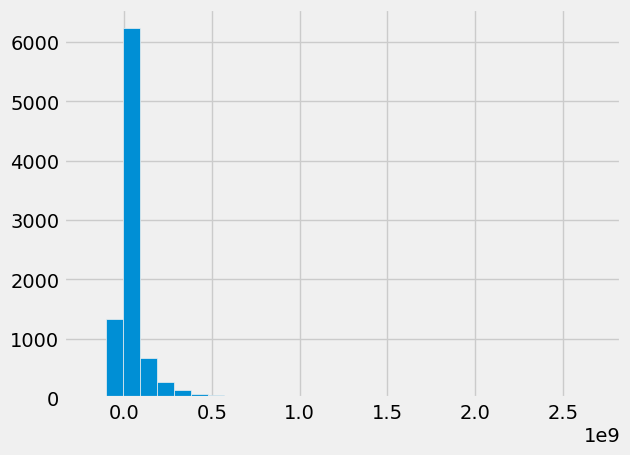

In [380]:
df['profit'].hist(bins=30)

As you can see here, the vast majorit of movies are very near the break-even point. In fact, a good amount of movies are in the net losses side. The idea of this analysis is to find what the magic is in the few that perform so well. It is important to note that the x-axis is in billions, so there a few movies that cleared 500 million in profit. Our analysis will continue with a test about if the month a movie is released matters.

## Hypothesis Test

As a moviemaker, you must put some serious thought about when to release a movie. Should you release it in the summer as a stereotype 'summer blockbuster' or should you release it in the dead of winter when everyone is pretty bored? Maybe in the spring? Let's see if there is any evidence about which time would be the best. First, we have to create a new column of the dataset with just the month value.

In [381]:
df.insert(loc=8,column = 'month', value = pd.DatetimeIndex(df['release_date']).month)
df.head()

,title,vote_average,vote_count,release_date,revenue,runtime,profit,budget,month,popularity
0,Inception,8.3640,34495,2010-07-15,825532764,148,665532764,160000000,7,83.9520
1,Interstellar,8.4170,32571,2014-11-05,701729206,169,536729206,165000000,11,140.2410
2,The Dark Knight,8.5120,30619,2008-07-16,1004558444,152,819558444,185000000,7,130.6430
3,Avatar,7.5730,29815,2009-12-15,2923706026,162,2686706026,237000000,12,79.9320
4,The Avengers,7.7100,29166,2012-04-25,1518815515,143,1298815515,220000000,4,98.0820


Now that we have the month column, we can chart a few things about the months to gain more information about this. First, we can visualize how many movies were released in each month. Then, we can visualize the total profit for each month. We will be conducting the test on the latter.

<Axes: xlabel='month'>

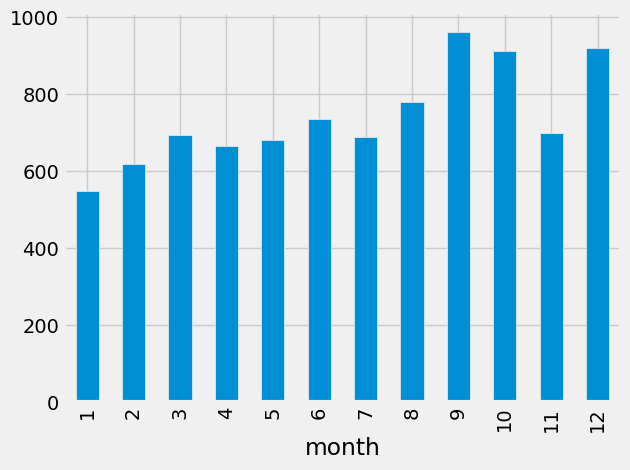

In [382]:
df = df.sort_values(by=['month']) #sorting by month to make the graph in order of month
df['month'].value_counts(sort=False).plot(kind='bar')

As we can see, studios prefer to release movies near the end of the year, especialy September, October, and December. Let's see how the profits compare.

<Axes: xlabel='month'>

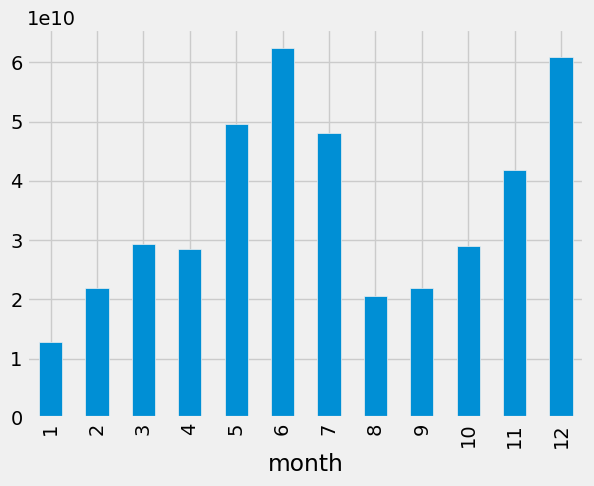

In [383]:
df['profit'].groupby(df['month']).sum().plot(kind='bar')

Clearly, there are pretty significant differences in the amount of profit by month. This generally confirms my consumption that the best movies are released in the summer and in the winter as June and December are the top values in this chart. Let's confirm that this is not just due to random chance by conducting a TVD test on the months. We can do this by making each month a proportion on the total profit of all of the movies in the dataset. We will make a new dataframe with just the necessary values for this test. Also, we must control for the number of movies released in each month. As a result, we would assume that each month has a proportion of the total profit equal to the proportion of movies released in that month as compared to the year. For example, our null hypothesis specifically would be that each month has 1/12 of the total profit of movies if an equal amount of movies were released each month.

Null hypothesis: There is no difference in the proportion of profit of movies for each month when controlling for the number of movies.

<Axes: xlabel='month'>

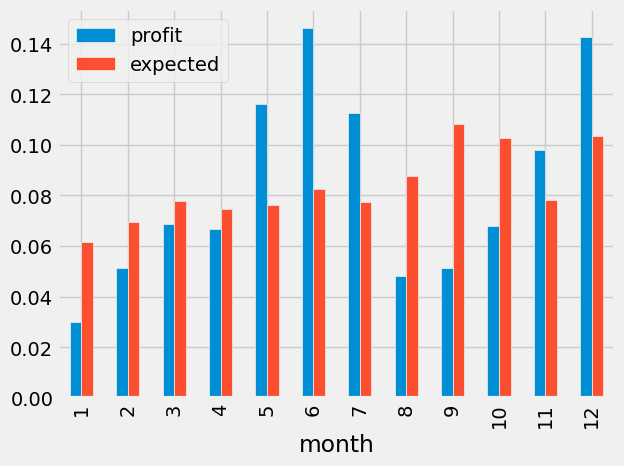

In [384]:
months = pd.Series([1,2,3,4,5,6,7,8,9,10,11,12])
profit_prop = (df['profit'].groupby(df['month']).sum())/df['profit'].sum()

expected_prop = np.array([])
for i in range(1,13):
    exp = (len(df[df['month']==i])/len(df))
    expected_prop = np.append(expected_prop, exp)

new_df = pd.Series.to_frame(profit_prop)
new_df.insert(loc=1, column='expected', value=expected_prop)
new_df.plot.bar()

In [385]:
new_df

,profit,expected
month,,
1,0.0299,0.0616
2,0.0513,0.0694
3,0.0687,0.0779
4,0.0667,0.0748
5,0.1163,0.0763
6,0.1463,0.0826
7,0.1127,0.0774
8,0.0480,0.0876
9,0.0514,0.1081


You can see the difference from the null hypothesis in this instance in the above bar chart. However, there is a chance this is just due to random chance. We can simulate this by randomly selecting n movies from the dataset for each month where n is the original number of movies in the month. From there, we can determine the total absolute distance in proportion from the expected proportions and see where the original statistic stacks up against the simulations.

In [386]:
def TVD(dataframe):
    return sum(abs(dataframe['profit']-dataframe['expected']))

def simulation():
    sim_df = pd.DataFrame(expected_prop, columns=['expected']) #creating new dataframe from array of expectations
    monthProfitProps = np.array([]) # to store profit proportions to be added to dataframe
    for i in range(0,12):
        sampleDF = df.sample(n=len(df[df['month']==i]))#sample of proper length
        monthProfit = sampleDF['profit'].sum()#finds profit
        monthProfitProps = np.append(monthProfitProps, monthProfit/df['profit'].sum())
    sim_df.insert(loc=1,value=monthProfitProps,column = 'profit')

    return TVD(sim_df)

simulation()

0.2285519624832828

The simulation method runs creates a sample statistic assuming that there is not influence on month and profitability while controlling for number of movies originally released in that month. We can now run the simulation thousands of times and see where our initial statistic lies on it which is:

In [387]:
TVD(new_df)

0.3955569424202046

In [388]:
simulations = np.array([])
for i in range(3000):
    #simulations = np.append(simulations, simulation())

In [389]:
pd.DataFrame(simulations, columns=['TVDs']).hist()

Clearly our initial sample statistic of about .4 has a p-value of 0. So, we can confidently say that we reject the null that there is no difference in the proportion of profit of movies for each month when controlling for the number of movies.

So, for this section it would appear that we can conclude that when a movie is released does seem to have some impact on its profitability. However, it could be possible that studios can tell whether a movie is likely to be profitable or not before it is released which then they could purposely put it during one of the most profitable months (June or December). Regardless, our test confirmed that something other than just random chance results in the profits of movies distribution across the 12 months.

## Prediction Method

For the next step of the analysis, I will create a multi-variable regression model to guess the profitability of movies using a variety of metrics. To focus on our initial question, I will limit the variables in the regression to things that the movie studio would be able to control. For example, the movie studio can not predict how many reviews on TMDb, but can determine the runtime, budget, and release date. For the sake of the model, we will also assume that the studio can control to some extent how popular the movie is using focus groups, consumer analysis, etc. We must also incorporate the year in our calculation to account for inflation. First, we can explore the correlations of the variables to each other.

In [390]:
df['release_date'] = pd.to_datetime(df['release_date'])
corr_df = df.drop(labels=['title',], axis=1)

In [391]:
corr_df.corr()

,vote_average,vote_count,release_date,revenue,runtime,profit,budget,month,popularity
vote_average,1.0000,0.3663,-0.0707,0.2150,0.3236,0.2313,0.0874,0.0922,0.1276
vote_count,0.3663,1.0000,0.1513,0.7453,0.1840,0.7225,0.5796,0.0366,0.1760
release_date,-0.0707,0.1513,1.0000,0.1561,0.0540,0.1158,0.2455,-0.0348,0.0973
revenue,0.2150,0.7453,0.1561,1.0000,0.1906,0.9811,0.7370,0.0245,0.2190
runtime,0.3236,0.1840,0.0540,0.1906,1.0000,0.1695,0.2016,0.0975,0.0561
profit,0.2313,0.7225,0.1158,0.9811,0.1695,1.0000,0.5922,0.0222,0.1958
budget,0.0874,0.5796,0.2455,0.7370,0.2016,0.5922,1.0000,0.0243,0.2281
month,0.0922,0.0366,-0.0348,0.0245,0.0975,0.0222,0.0243,1.0000,0.0073
popularity,0.1276,0.1760,0.0973,0.2190,0.0561,0.1958,0.2281,0.0073,1.0000


First, we have to split our data into a training and testing set. To do this, we can shuffle the dataframe using the sample method, then splitting it into 25% testing and 75% training.

In [392]:
df = df.sample(frac=1)
train = df[0:int(.75*df.shape[0])]
test = df[int(.75*df.shape[0]):]

#have to reindex for regression
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

We can also eliminate all of the variables we will not be using in a new dataframe and adjust the release date to just include the year.

In [393]:
pred_df = df.drop(labels=['title', 'vote_count', 'revenue', 'popularity', 'month', 'release_date'], axis=1)

In [394]:
pred_df.head()

,vote_average,runtime,profit,budget
5691,6.9010,114,20509515,15000000
30615,6.8000,110,29840000,4160000
26394,5.8180,155,5,12
12594,6.4330,76,5779749,7520000
100,7.8970,129,417407695,30000000


To implement the model, we will use the datascience package.

In [395]:
from datascience import *

In [396]:
movies = Table.from_df(pred_df)
train,test = movies.split(4453) #split in half for train/test

def predict(slopes, row):
    return sum(slopes * np.array(row))

train_profits = train.column(2) #new table without all of the attributes
train_attributes = train.drop(2) #new table without the profits

def rmse(slopes, attributes, prices): #finds root mean square error
    errors = []
    for i in np.arange(len(prices)):
        predicted = predict(slopes, attributes.row(i))
        actual = prices.item(i)
        errors.append((predicted - actual) ** 2)
    return np.mean(errors) ** 0.5

def rmse_train(slopes): #function to be minimized.
    return rmse(slopes, train_attributes, train_profits)


best_slopes = minimize(rmse_train, start=[1,1,1], smooth=True, array=True)
Table(train_attributes.labels).with_row(list(best_slopes)).show()

vote_average,runtime,budget
2720.48,-43629.4,2.0716


The positive slopes for budget and vote_average make sense within the context, but the runtime slope doesn't make a lot of sense. However, I can see how it would make sense that runtime will eventually reach a threshold where a movie being too long has a negative effect on profitability. Do the strict nature of a linear regression model, it is forced to pick one slope so the negative slope must work best.

In [398]:
rmse(best_slopes, train_attributes, train_profits)

107198877.73267958

The root mean square error being so high is an early indicator that the model is very poor.

In [408]:
test_profits = test.column(2)
test_attributes = test.drop(2)


def rmse_test(slopes):
    return rmse(slopes, test_attributes, test_profits)

rmse_linear = rmse_test(best_slopes)
print('Test set RMSE for multiple linear regression:', rmse_linear)

Test set RMSE for multiple linear regression: 113926837.313


In [400]:
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

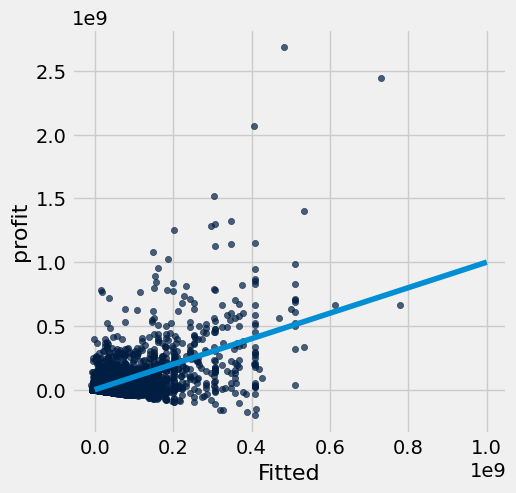

In [407]:
def fit(row):
    return sum(best_slopes * np.array(row))

test.with_column('Fitted', test.drop(2).apply(fit)).scatter('Fitted', 2)

plots.plot([0, 1e9], [0, 1e9]);

Clearly, the model struggles to predict the profitable of the movies. This is not completely unexpected as our data does not properly capture many of the factors that go into the profitability of a movie. I will expand on this in the conclusion section.

## Conclusions

Overall, our analysis has revealed many interesting things about movies. In the exploratory data analysis, we saw just how many movies fail to be profitable. In addition, we saw that very few are highly profitable. Next, we found that when a movie is released does seem to have some impact on its profitability. While this could be due to a multitude of factors, it is important to note that random chance is not the factor. Whether it be that studios purposely release movies they anticipate to be profitable in certain months or if movies being released in certain months become more profitable because of the release timing, we know that this descrepancy is not due until random chance. In the final phase of the analysis, it became clear how hard it is to predict the profitability of movies with a multiple regression model. It was especially difficult because we limited the variables to things you would not know prior to the movies release. It is likely that a better model could be created using a more advanced model such as a random forest or machine learning model. Regardless of the models success, we learned more about the positive relationship between budget and profitability. Overall, the movie dataset was difficult to wrangle with but the insight into release month timing and profitability prediction made it well worth it.